# Working with Table Data

Here we will use the python library to work with data that comes to us in the form of a table. That data may be in a spreadsheet, or a table of a database. 

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
print(np.__version__)

1.15.3


In [2]:
import pandas as pd
print(pd.__version__)

0.23.4


In [3]:
from matplotlib import pyplot as plt
import matplotlib
print(matplotlib.__version__)

3.0.1


In [4]:
df = pd.read_csv('http://bit.ly/titanic-train')
df.head()

In [5]:
df.head(10)

In [6]:
df.tail()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#how do we take a statistical snapshot?
df.describe()

In [9]:
df.describe??

In [10]:
df.describe(include='all')

In [11]:
# the docs say to use the include keyword and 'O' argument
df.describe(include=['O'])

In [12]:
# How do we see how many people survived?  1=Survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

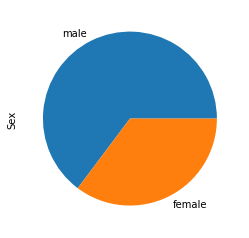

In [15]:
%matplotlib inline
fig, ax = plt.subplots()
df['Sex'].value_counts().plot.pie(ax=ax)#, #labels=["Died", "Lived"])
ax.set_aspect('equal') # this makes it a circle

## Challenge

* Print the value counts of another variable (example: cabin)
* Create a pie chart for another variable

In [16]:
# What if we want to see how the people who survived differ from those who deid?
survived_df = df.groupby(['Survived'])
survived_df

In [17]:
list_survived_df=list(survived_df)
len(list_survived_df)

2

In [18]:
len(list_survived_df[0])

2

In [19]:
list_survived_df[0][0],list_survived_df[1][0]

(0, 1)

In [20]:
list_survived_df[0][1].head()

In [21]:
list_survived_df[1][1].head()

In [22]:
# How do we get a summary of that?
survived_df.count()

In [23]:
#how do we now disaggregate the data to compute a cross tabulation?
by_demo = df.groupby(['Sex', 'Pclass'])
#unstack creates the table
by_demo['Survived'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

In [24]:
# Can we put it into a table?
by_demo['Survived'].sum().unstack()

In [25]:
#Let's compute a survival rate
Survival_rate = by_demo['Survived'].sum()/by_demo['Survived'].count()
Survival_rate.unstack()

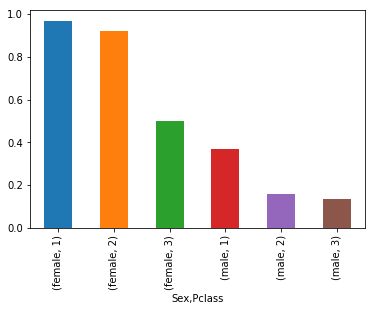

In [26]:
Survival_rate.plot.bar()

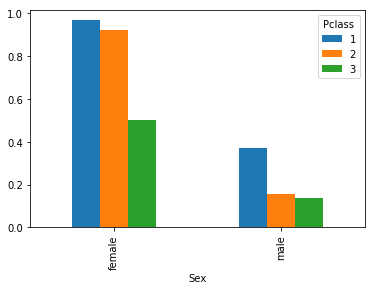

In [27]:
Survival_rate.unstack().plot.bar()

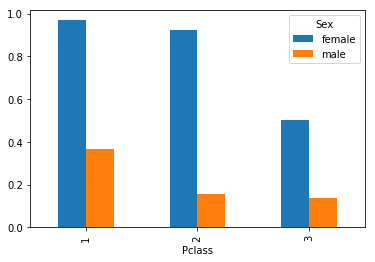

In [28]:
#what about grouped by sex first?
# can we group?
Survival_rate.unstack().T.plot.bar()
Survival_rate.unstack().T

In [29]:
corr = df.corr()
corr[corr<1]

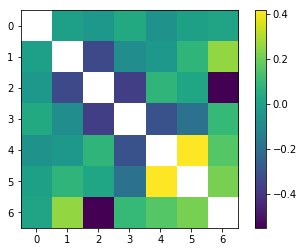

In [30]:
corr = df.corr().values
corr[corr==1] = np.nan
# Is there a correlation?
fig, ax = plt.subplots()
im = ax.imshow(corr)
fig.colorbar(im)

In [31]:
#What if we want to apply different aggregations to different columns?
#{'key':value} is a Python data structure called a dictionary
df.groupby(['Pclass', 'Sex']).agg( {'Survived': np.sum, 
                                    'Fare': np.mean, 
                                    'Age': np.median})

## Challenge

* Compute a cross tabulation using a different variable in the dataset
* Plot a chart that illustrates your findings
* If possible, compute the correlation between survival and that variable